Current Plan

Text Preprocessing
Clustering to provide labels
Use naive bayes, svm and maybe XGBoost to train and classify

Important Links
Kernel for SVM
https://towardsdatascience.com/kernel-function-6f1d2be6091#:~:text=In%20machine%20learning%2C%20a%20%E2%80%9Ckernel,solve%20a%20non%2Dlinear%20problem.&text=The%20kernel%20function%20is%20what,in%20which%20they%20become%20separable

Clustering Example
https://medium.com/@krause60/news-article-clustering-using-unsupervised-learning-7647600a04fd

NLP tutorial
https://www.kaggle.com/itratrahman/nlp-tutorial-using-python


In [1]:
#Code for text cleaning borrowed from https://www.kaggle.com/itratrahman/nlp-tutorial-using-python
import numpy as np
import pandas as pd
import gensim
from sklearn import preprocessing
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
import matplotlib
from matplotlib import pyplot as plt
# import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


In [ ]:
data

In [ ]:
from google.colab import drive
drive.mount('/content/drive/capstone/dataset/Base')

In [2]:
data = pd.read_excel (r'BaseActivities.xlsx', sheet_name='Masterlist')
data.head(10)

FileNotFoundError: ignored

In [ ]:
BIM_len = data[data['Trade'] == 'BIM'].shape[0]
CNS_len = data[data['Trade'] == 'CNS'].shape[0]
PREP_len = data[data['Trade'] == 'PREP'].shape[0]

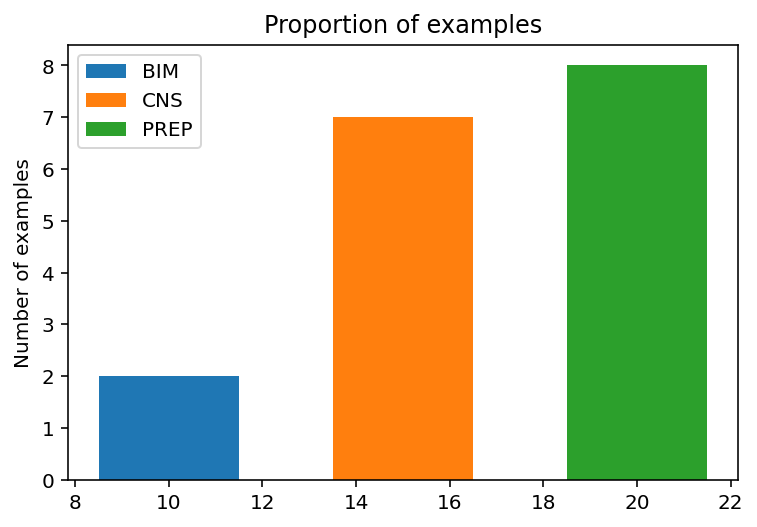

In [ ]:
plt.bar(10,BIM_len,3, label="BIM")
plt.bar(15,CNS_len,3, label="CNS")
plt.bar(20,PREP_len,3, label="PREP")
plt.legend()
plt.ylabel('Number of examples')
plt.title('Proportion of examples')
plt.show()

In [ ]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [ ]:
data2 = data.fillna({'Full Description':''})
data2.head(20)

,Trade,Base Activity,Full Description,Synonyms,Code
0,BIM,Clash Analysis,Clash Analysis.,NaN,NaN
1,BIM,FM Development,Facility Management Development,NaN,NaN
2,CNS,Formwork,"Installation, of Formwork",NaN,NaN
3,CNS,Rebar,Installation of Reinforced Steel Bar,NaN,NaN
4,CNS,Cast,Casting,Concreting,NaN
5,CNS,Steel Structure,Installation of Steel Structure,NaN,NaN
6,CNS,Bondek,Installation of Bondek,NaN,NaN
7,CNS,Staircase,"Formwork, Rebar and Cast Staircase",NaN,NaN
8,CNS,Roof Truss & Roofing,,NaN,NaN
9,PREP,Shop Drawing Preparation,Drawing Preparation,NaN,NaN


In [ ]:
data2['Full Description'] = data2['Full Description'].apply(remove_punctuation)
data2.head(20)

,Trade,Base Activity,Full Description,Synonyms,Code
0,BIM,Clash Analysis,Clash Analysis,NaN,NaN
1,BIM,FM Development,Facility Management Development,NaN,NaN
2,CNS,Formwork,Installation of Formwork,NaN,NaN
3,CNS,Rebar,Installation of Reinforced Steel Bar,NaN,NaN
4,CNS,Cast,Casting,Concreting,NaN
5,CNS,Steel Structure,Installation of Steel Structure,NaN,NaN
6,CNS,Bondek,Installation of Bondek,NaN,NaN
7,CNS,Staircase,Formwork Rebar and Cast Staircase,NaN,NaN
8,CNS,Roof Truss & Roofing,,NaN,NaN
9,PREP,Shop Drawing Preparation,Drawing Preparation,NaN,NaN


# POS?


In [ ]:
# extracting the stopwords from nltk library
sw = stopwords.words('english')
# displaying the stopwords
np.array(sw)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [ ]:
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

In [ ]:
data_nostopwords = data2
data_nostopwords['Full Description'] = data_nostopwords['Full Description'].apply(stopwords)
data_nostopwords.head(10)

,Trade,Base Activity,Full Description,Synonyms,Code
0,BIM,Clash Analysis,clash analysis,NaN,NaN
1,BIM,FM Development,facility management development,NaN,NaN
2,CNS,Formwork,installation formwork,NaN,NaN
3,CNS,Rebar,installation reinforced steel bar,NaN,NaN
4,CNS,Cast,casting,Concreting,NaN
5,CNS,Steel Structure,installation steel structure,NaN,NaN
6,CNS,Bondek,installation bondek,NaN,NaN
7,CNS,Staircase,formwork rebar cast staircase,NaN,NaN
8,CNS,Roof Truss & Roofing,,NaN,NaN
9,PREP,Shop Drawing Preparation,drawing preparation,NaN,NaN


In [ ]:
#Lemmatizing
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import nltk

w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

data_lemmatize = data_nostopwords
data_lemmatize['Full Description'] = data_lemmatize['Full Description'].apply(lemmatize_text)
data_lemmatize['Full Description'] = data_lemmatize['Full Description'].str.join(' ')

In [ ]:
data_lemmatize

,Trade,Base Activity,Full Description,Synonyms,Code
0,BIM,Clash Analysis,clash analysis,NaN,NaN
1,BIM,FM Development,facility management development,NaN,NaN
2,CNS,Formwork,installation formwork,NaN,NaN
3,CNS,Rebar,installation reinforced steel bar,NaN,NaN
4,CNS,Cast,casting,Concreting,NaN
5,CNS,Steel Structure,installation steel structure,NaN,NaN
6,CNS,Bondek,installation bondek,NaN,NaN
7,CNS,Staircase,formwork rebar cast staircase,NaN,NaN
8,CNS,Roof Truss & Roofing,,NaN,NaN
9,PREP,Shop Drawing Preparation,drawing preparation,NaN,NaN


In [ ]:
descript = data_lemmatize['Full Description'].tolist()
descript

['clash analysis',
 'facility management development',
 'installation formwork',
 'installation reinforced steel bar',
 'casting',
 'installation steel structure',
 'installation bondek',
 'formwork rebar cast staircase',
 '',
 'drawing preparation',
 'drawing review',
 'drawing submission',
 'drawing approval',
 'drawing preparation',
 'drawing review',
 'drawing submission',
 'drawing approval',
 'installation falsework',
 '',
 'im thinking gigantic moon dancer',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'procurement',
 'delivery',
 'installation',
 'procurement',
 'delivery',
 'installation',
 '',
 'procurement',
 'delivery',
 'installation',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '']

# Text counts

<AxesSubplot:>

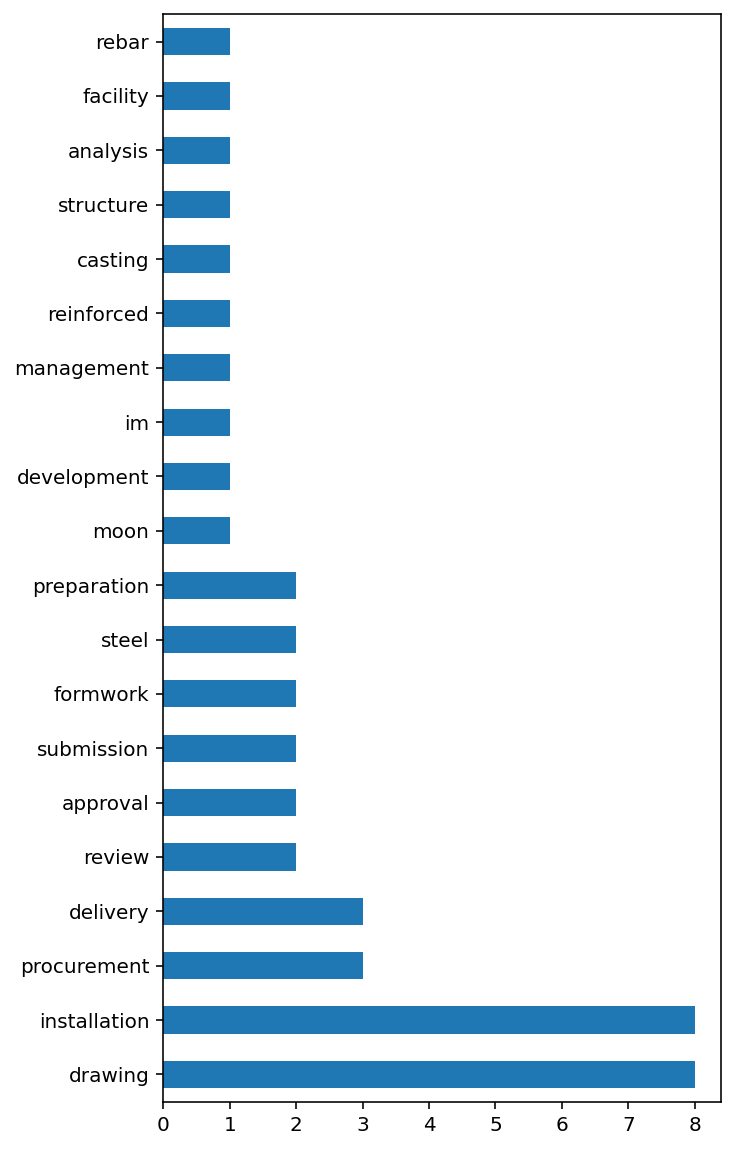

In [ ]:
freq= pd.Series((' '.join(data_lemmatize['Full Description']).split())).value_counts().sort_values(ascending = False)
freq

# plot of the top vocab
top_vacab = freq.head(20)
top_vacab.plot(kind = 'barh', figsize=(5,10))

# Vectorizing text

In [ ]:
# create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer(input='english')
# fit the vectorizer using the text data
tfid_vectorizer.fit(data_lemmatize['Full Description'])
# collect the vocabulary items used in the vectorizer
dictionary = tfid_vectorizer.vocabulary_.items()  
dictionary

dict_items([('clash', 6), ('analysis', 0), ('facility', 11), ('management', 17), ('development', 9), ('installation', 16), ('formwork', 13), ('reinforced', 22), ('steel', 25), ('bar', 2), ('casting', 5), ('structure', 26), ('bondek', 3), ('rebar', 21), ('cast', 4), ('staircase', 24), ('drawing', 10), ('preparation', 19), ('review', 23), ('submission', 27), ('approval', 1), ('falsework', 12), ('im', 15), ('thinking', 28), ('gigantic', 14), ('moon', 18), ('dancer', 7), ('procurement', 20), ('delivery', 8)])

<AxesSubplot:>

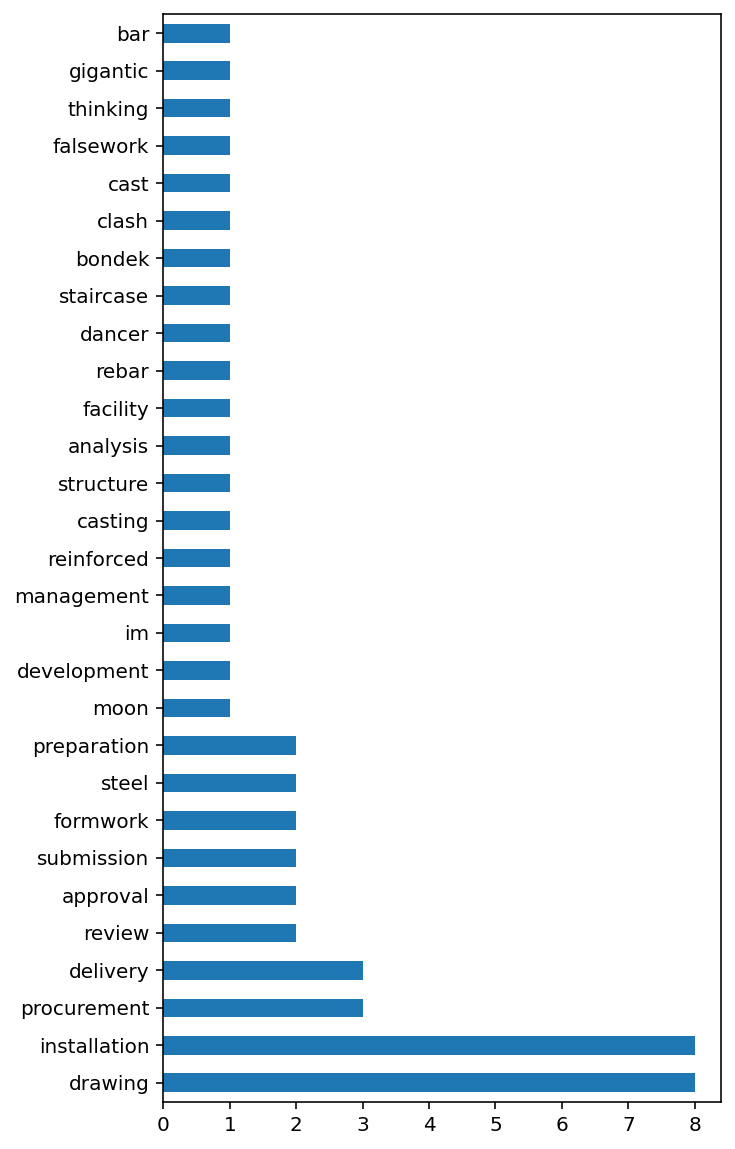

In [ ]:
freq= pd.Series((' '.join(data_lemmatize['Full Description']).split())).value_counts().sort_values(ascending = False)
# plot of the top vocab
top_vacab = freq.head(30)
top_vacab.plot(kind = 'barh', figsize=(5,10))

In [ ]:
# extract the tfid representation matrix of the text data
tfid_matrix = tfid_vectorizer.transform(data_lemmatize['Full Description'])
# collect the tfid matrix in numpy array
array = tfid_matrix.todense()

In [ ]:
df = pd.DataFrame(array)
df

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,0.707107,0.00000,0.000000,0.000000,0.000000,0.0,0.707107,0.000000,0.0,0.00000,...,0.00000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000
1,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.57735,...,0.00000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000
2,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.00000,...,0.00000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000
3,0.000000,0.00000,0.555578,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.00000,...,0.00000,0.0,0.000000,0.555578,0.00000,0.000000,0.502910,0.000000,0.00000,0.000000
4,0.000000,0.00000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.0,0.00000,...,0.00000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000
5,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.00000,...,0.00000,0.0,0.000000,0.000000,0.00000,0.000000,0.604848,0.668192,0.00000,0.000000
6,0.000000,0.00000,0.000000,0.839077,0.000000,0.0,0.000000,0.000000,0.0,0.00000,...,0.00000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000
7,0.000000,0.00000,0.000000,0.000000,0.511685,0.0,0.000000,0.000000,0.0,0.00000,...,0.00000,0.0,0.511685,0.000000,0.00000,0.511685,0.000000,0.000000,0.00000,0.000000
8,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.00000,...,0.00000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000
9,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.00000,...,0.81298,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000


# Word2Vec

In [ ]:
import gensim
from gensim.models import Word2Vec

In [ ]:
data_lemmatize2 = data_lemmatize["Full Description"]
df['tokens']=df['Full Description'].apply(tokenization_function)
df['tokens']=df['tokens'].apply(lambda x:[x])
df['bigrams']=df['tokens'].apply(bigrams)

0                        clash analysis
1       facility management development
2                 installation formwork
3     installation reinforced steel bar
4                               casting
5          installation steel structure
6                   installation bondek
7         formwork rebar cast staircase
8                                      
9                   drawing preparation
10                       drawing review
11                   drawing submission
12                     drawing approval
13                  drawing preparation
14                       drawing review
15                   drawing submission
16                     drawing approval
17               installation falsework
18                                     
19     im thinking gigantic moon dancer
20                                     
21                                     
22                                     
23                                     
24                                     


In [ ]:
#tokenizing
for i in data_lemmatize2(f):
    temp = []
      
    # tokenize the sentence into words
    for j in word_tokenize(i):
        temp.append(j.lower())
  
    data.append(temp)
  

TypeError: 'Series' object is not callable

In [ ]:
model = Word2Vec(data_lemmatize, min_count=1,size= 50,workers=3, window =3, sg = 1)

TypeError: __init__() got an unexpected keyword argument 'size'

In [ ]:
data_lemmatize